In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
x=df.iloc[:,[2,3]]
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [8]:
y=df["Purchased"]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
# Applying train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [1]:
#classification algo
#step1 : import the model from package
from sklearn.neighbors import KNeighborsClassifier

#step2 : create the object
knn=KNeighborsClassifier(n_neighbors=3)

#step3 : train the model
knn.fit(xtrain,ytrain)

#step4 : make prediction
ypred=knn.predict(xtest)

NameError: name 'xtrain' is not defined

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy_score(ytest,ypred)

0.76

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(ytest,ypred)

array([[48, 10],
       [14, 28]], dtype=int64)

In [15]:
(48+28)/(48+10+14+28)

0.76

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        58
           1       0.74      0.67      0.70        42

    accuracy                           0.76       100
   macro avg       0.76      0.75      0.75       100
weighted avg       0.76      0.76      0.76       100



In [18]:
ac_list=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    ac_list.append(ac)

In [21]:
print(ac_list)

[0.75, 0.71, 0.76, 0.72, 0.75, 0.71, 0.73, 0.71, 0.74, 0.74, 0.75, 0.73, 0.75, 0.72, 0.74, 0.7, 0.76, 0.71, 0.73, 0.7, 0.69, 0.7, 0.71, 0.71, 0.71, 0.69, 0.73, 0.72, 0.72]


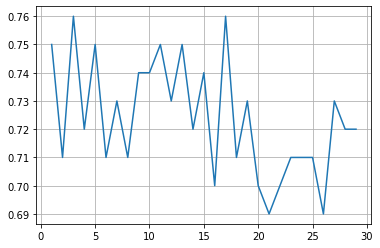

In [20]:
plt.plot(range(1,30),ac_list)
plt.grid()